<a href="https://colab.research.google.com/github/deepandas11/Deep-Learning-with-TensorFlow-Keras-PyTorch/blob/master/Hidden_Layer_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hidden Layer Representation

Here we will explore FCNs for a classification task.

Keras supports two kinds of models: Sequential and Graph. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers.core import Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping

nb_classes = 10

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience = 4, verbose=1)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
def plot_history(network_history):
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(network_history.history['loss'])
  plt.plot(network_history.history['val_loss'])
  plt.legend(['Training', 'Validation'])
  
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(network_history.history['acc'])
  plt.plot(network_history.history['val_acc'])
  plt.legend(['Training', 'Validation'])
  
  plt.show()

In [0]:
#Adjusting shape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [17]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=50, verbose=1,validation_split = 0.1,callbacks = [early_stop])
model.summary()

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 55us/step - loss: 2.1663 - acc: 0.2692 - val_loss: 1.9815 - val_acc: 0.5555
Epoch 2/50
54000/54000 [==============================] - 2s 41us/step - loss: 1.8978 - acc: 0.5019 - val_loss: 1.6919 - val_acc: 0.7083
Epoch 3/50
54000/54000 [==============================] - 2s 41us/step - loss: 1.6366 - acc: 0.6243 - val_loss: 1.4110 - val_acc: 0.7688
Epoch 4/50
54000/54000 [==============================] - 2s 41us/step - loss: 1.3962 - acc: 0.6861 - val_loss: 1.1647 - val_acc: 0.8055
Epoch 5/50
54000/54000 [==============================] - 2s 41us/step - loss: 1.1912 - acc: 0.7263 - val_loss: 0.9694 - val_acc: 0.8293
Epoch 6/50
54000/54000 [==============================] - 2s 41us/step - loss: 1.0346 - acc: 0.7522 - val_loss: 0.8245 - val_acc: 0.8477
Epoch 7/50
54000/54000 [==============================] - 2s 41us/step - loss: 0.9185 - acc: 0.7733 - val_loss: 0.7180 - val_acc:

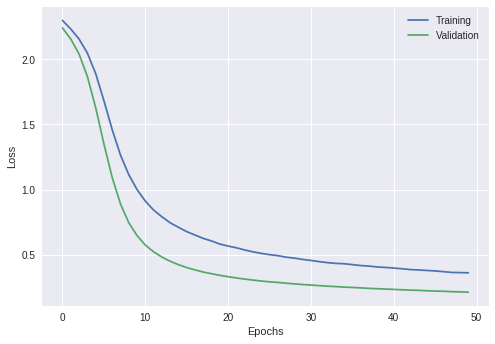

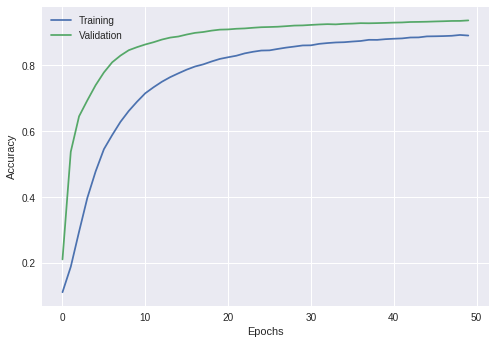

In [0]:
plot_history(network_history)

#### Extracting hidden layer representation

One simple way to do this is to use the weights if your model to build a new model that is truncated at the layer you want to read. Another way is to use Keras backend on tensors

In [0]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dropout(0.2))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [0]:
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])


True

In [19]:
hidden_features = model_truncated.predict(X_train)
hidden_features.shape

(60000, 512)

### Generate embeddings using TSNE

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne=tsne.fit_transform(hidden_features[:1000])

colors_map = np.argmax(Y_train, axis =1)
X_tsne.shape

(1000, 2)

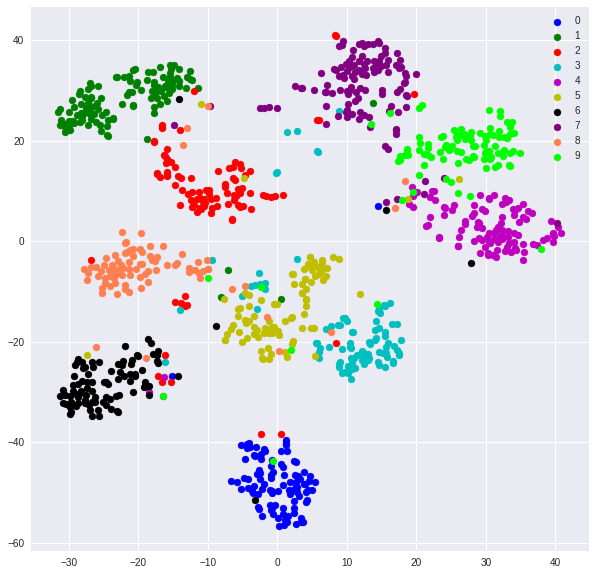

In [23]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()